# 1. Preparing dataset

In [17]:
!wc -l /data/cmpe249-fa22/waymotrain200cocoyolo/*.txt

  16110 /data/cmpe249-fa22/waymotrain200cocoyolo/images_test.txt
 128877 /data/cmpe249-fa22/waymotrain200cocoyolo/images_train.txt
 161096 /data/cmpe249-fa22/waymotrain200cocoyolo/images.txt
  16109 /data/cmpe249-fa22/waymotrain200cocoyolo/images_val.txt
 322192 total


In [45]:
#bring partial dataset 
def preparing(filename, des, cnt):
    file = open(filename, "r")
    idx = 0
    ori_path = '/data/cmpe249-fa22/waymotrain200cocoyolo/'
    
    for line in file:
        if (idx==cnt):
            print("stop .." , idx)
            break

        line = line.strip()
        image_path = ori_path+line
        label_path = ori_path+"./labels/" + line.split("/")[2].split(".")[0] + ".txt"

        if os.path.isfile(image_path) and os.path.isfile(label_path):
            cmd = 'cp ' + image_path + ' ./' + des + '/images/'
            os.system(cmd)
            
            cmd = 'cp ' + label_path + ' ./' + des + '/labels/'
            os.system(cmd)
    
            idx += 1
        else:
            print(line + " file dosen't exist.. ")
    file.close()

In [ ]:
preparing("images_train.txt", 'train', 1000)
preparing("images_val.txt", 'valid', 100)
preparing("images_test.txt", 'test', 100)

In [1]:
#check the number of classes and objects
def check_classes(filename, cnt):
    classes_map = {}
    file = open(filename, "r")
    idx = 0
    ori_path = '/data/cmpe249-fa22/waymotrain200cocoyolo/labels/'
    
    for line in file:
        if (idx==cnt):
            print(filename, " end " , idx)
            break

        line = line.strip()
        label_path = ori_path + line.split("/")[2].split(".")[0] + ".txt"

        if os.path.isfile(label_path):
            labels = open(label_path, "r")
            for label in labels:
                c = int(label.split(" ")[0])
                if c in classes_map:
                    classes_map[c] +=1
                else:
                    classes_map[c] = 1
    
            labels.close()
        idx +=1
    file.close()

    return classes_map

In [15]:
print(check_classes('images_train.txt', 1000))
print(check_classes('images_val.txt', 100))
print(check_classes('images_test.txt', 100))

images_train.txt  end  1000
{0: 9100, 1: 2406, 3: 91}
images_val.txt  end  100
{0: 1061, 1: 340, 3: 14}
images_test.txt  end  100
{0: 827, 1: 336, 3: 6}


# 2. Check Setup environments

download

- git clone https://github.com/WongKinYiu/yolov7.git
- wget https://github.com/WongKinYiu/yolov7/releases/download/v0.1/yolov7x.pt

create two files:

- yolov7/data/waymo_data.yaml
- yolov7/cfg/training/yolov7x-waymo.yaml

```
pip install torch torchvision torchaudio tensorboard tqdm
pip install opencv-python matplotlib seaborn scipy
pip install --upgrade pyyaml==5.3.1
pip install wandb
```

In [1]:
#check current environment
!conda env list

# conda environments:
#
VAdepthENV               /home/013907062/.conda/envs/VAdepthENV
cmpe249               *  /home/013907062/.conda/envs/cmpe249
env_onmttf               /home/013907062/.conda/envs/env_onmttf
koen_base                /home/013907062/.conda/envs/koen_base
newDepth                 /home/013907062/.conda/envs/newDepth
test                     /home/013907062/.conda/envs/test
wmt_infer                /home/013907062/.conda/envs/wmt_infer
base                     /opt/ohpc/pub/apps/anaconda/3.9
stylegan2                /opt/ohpc/pub/apps/anaconda/3.9/envs/stylegan2



In [2]:
!pwd

/home/013907062/CMPE249/HW1_waymo


In [2]:
cd /home/013907062/CMPE249/HW1_waymo/yolov7

/home/013907062/CMPE249/HW1_waymo/yolov7


In [3]:
!pwd

/home/013907062/CMPE249/HW1_waymo/yolov7


In [17]:
import yaml
yaml.__version__

'6.0.1'

In [18]:
!nvidia-smi

Wed Sep 27 07:43:16 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 520.61.05    Driver Version: 520.61.05    CUDA Version: 11.8     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:04:00.0 Off |                    0 |
| N/A   24C    P0    28W / 250W |   1600MiB / 12288MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
try:
    import torch
    import torchvision
    print(f"torch version: {torch.__version__}")
    print(f"torchvision version: {torchvision.__version__}")
except:
    print(f"[INFO] torch/torchvision not available.")

torch version: 2.0.1+cu117
torchvision version: 0.15.2+cu117


# 3. Understainding Yolov7 architecture: Run a pre-trained model with one sample image 

In [7]:
import matplotlib.pyplot as plt
import os, json, cv2, random

In [ ]:
'''
run Yolov7 git sample code
'''
#!python train.py --device 0 --batch-size 8 --epochs 100 --img 640 640 --data data/kitti_data.yaml --hyp data/hyp.scratch.custom.yaml --cfg cfg/training/yolo7x-kitti.yaml --weights yolov7x.pt --name yolov7x-kitti-Vehicle

In [42]:
'''
run sample code in Yolov7 git.
'''
!python detect.py --weights yolov7x.pt --conf 0.5 --img-size 640 --source ./inference/images/image3.jpg --no-trace

Namespace(weights=['yolov7x.pt'], source='./inference/images/image3.jpg', img_size=640, conf_thres=0.5, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=True)
LOG YJ opt Namespace(weights=['yolov7x.pt'], source='./inference/images/image3.jpg', img_size=640, conf_thres=0.5, iou_thres=0.45, device='', view_img=False, save_txt=False, save_conf=False, nosave=False, classes=None, agnostic_nms=False, augment=False, update=False, project='runs/detect', name='exp', exist_ok=False, no_trace=True)
YOLOR 🚀 2023-9-18 torch 2.0.1+cu117 CUDA:0 (Tesla P100-PCIE-12GB, 12198.4375MB)

Fusing layers... 
Model Summary: 354 layers, 71311741 parameters, 571965 gradients
/home/013907062/.conda/envs/cmpe249/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the inde

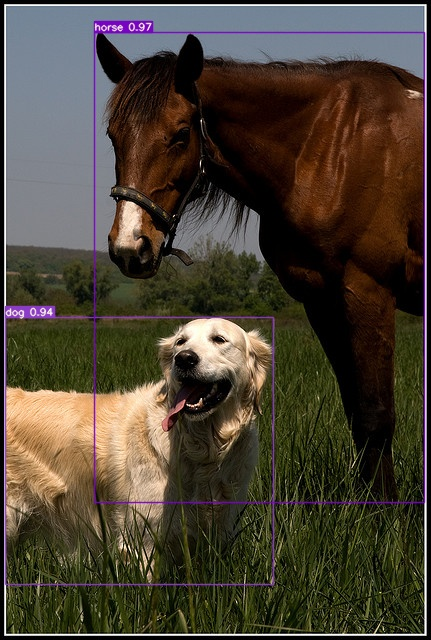

In [43]:
output = "runs/detect/exp13/image3.jpg"
from PIL import Image
im = Image.open(output)
im

# 4. ReTrain with Partial Waymo Dataset

## 4.1 Retrain: Yolov7 model with custom set

In [14]:
pwd

'/home/013907062/CMPE249/HW1/yolov7'

In [ ]:
'''
$ sbatch run.sh
'''
#!python MyYolov7Train.py --device 0 --batch-size 8 --epochs 100 --img 640 640 --data ./data/waymo_data.yaml --hyp ./data/hyp.scratch.custom.yaml --cfg ./cfg/training/yolov7x-waymo.yaml --weights yolov7x.pt --name ./yolov7x-waymo-mytrain

In [21]:
!tail log.train.log -n 30

                 all         100        1415       0.892        0.44       0.508       0.292
[LOG YJ] save checkpoint...
[LOG YJ] 
     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     97/99     9.67G   0.02632   0.01132 0.0002738   0.03791        28       640: 100%|██████████| 126/126 [01:35<00:00,  1.32it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 7/7 [00:02<00:00,  3.28it/s]
                 all         100        1415       0.879       0.476       0.545       0.312
[LOG YJ] save checkpoint...
[LOG YJ] 
     Epoch   gpu_mem       box       obj       cls     total    labels  img_size
     98/99     9.67G   0.02609   0.01105  0.000311   0.03745        18       640: 100%|██████████| 126/126 [01:35<00:00,  1.32it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100%|██████████| 7/7 [00:02<00:00,  3.28it/s]
                 all         100

## 4.2 Inference

In [1]:
pwd

'/home/013907062/CMPE249/HW1_waymo'

### 4.2.1 evaluation with valid dataset 'MyEvaluation.py'

In [24]:
!python MyEvaluation.py --data data/waymo_data.yaml --img 640 --batch 10 --conf 0.001 --iou 0.5 --weights runs/train/yolov7x-waymo-mytrain4/weights/best.pt

[LOG YJ] Start... opt is  Namespace(weights=['runs/train/yolov7x-waymo-mytrain4/weights/best.pt'], data='data/waymo_data.yaml', task='test', batch_size=10, img_size=640, conf_thres=0.001, iou_thres=0.5, device='', single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project='runs/test', name='exp', exist_ok=False, no_trace=False, v5_metric=False)
[LOG YJ] device cuda:0
[LOG YJ] save_dir runs/test/results2
Fusing layers... 
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

[LOG YJ] load data {'train': '../dataset/train', 'val': '../dataset/valid', 'test': '../dataset/test', 'nc': 4, 'names': ['vehicle', 'pedestrian', 'sign', 'cyclist']}
/home/013907062/.conda/envs/cmpe249/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/T

### 4.2.2 Visualization Originals VS Predictions

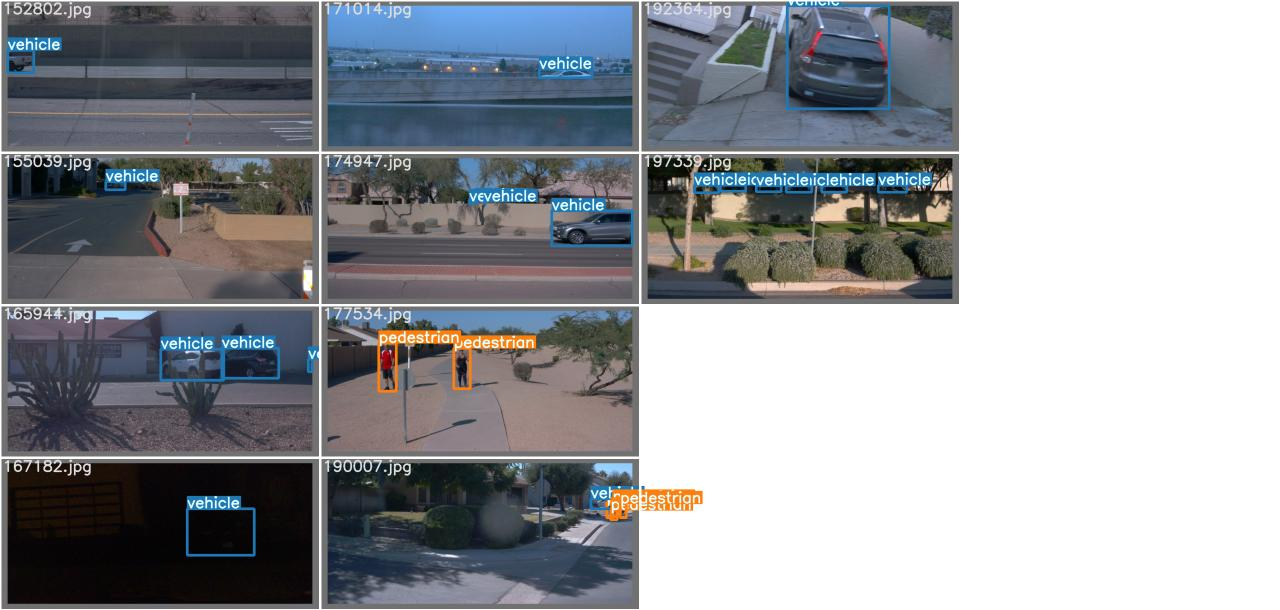

In [5]:
from PIL import Image
im = Image.open("./runs/test/results2/preds/test_batch2_labels.jpg")
im

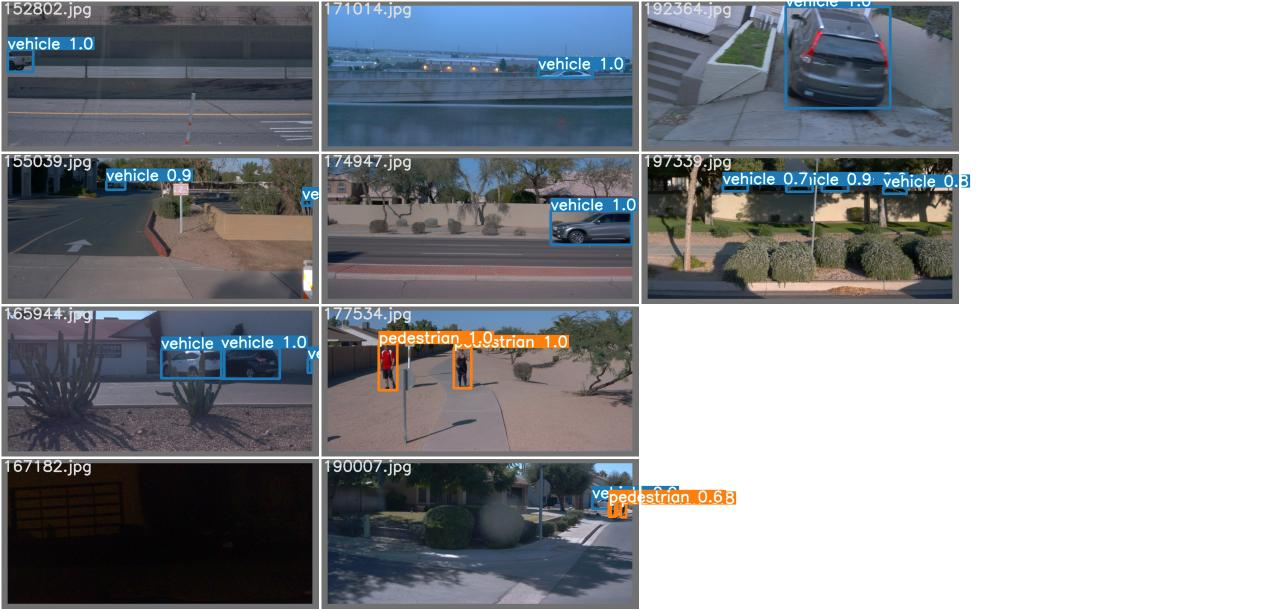

In [6]:
im = Image.open("./runs/test/results2/preds/test_batch2_pred.jpg")
im

### 4.2.3 A video inference pipeline

In [16]:
!python MyDetect.py --source ../dataset/test/images/005482.jpg --weights ./runs/train/yolov7x-waymo-mytrain4/weights/best.pt

[LOG YJ] Start... opt is  Namespace(weights=['./runs/train/yolov7x-waymo-mytrain4/weights/best.pt'], source='../dataset/test/images/005482.jpg')
Fusing layers... 
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/home/013907062/.conda/envs/cmpe249/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
9 vehicles, 1 pedestrian, Done. (28.6ms) Inference, (2.4ms) NMS
 The image with the result is saved in: runs/detect/results3/005482.jpg
Done. (0.204s)
[LOG YJ] END...


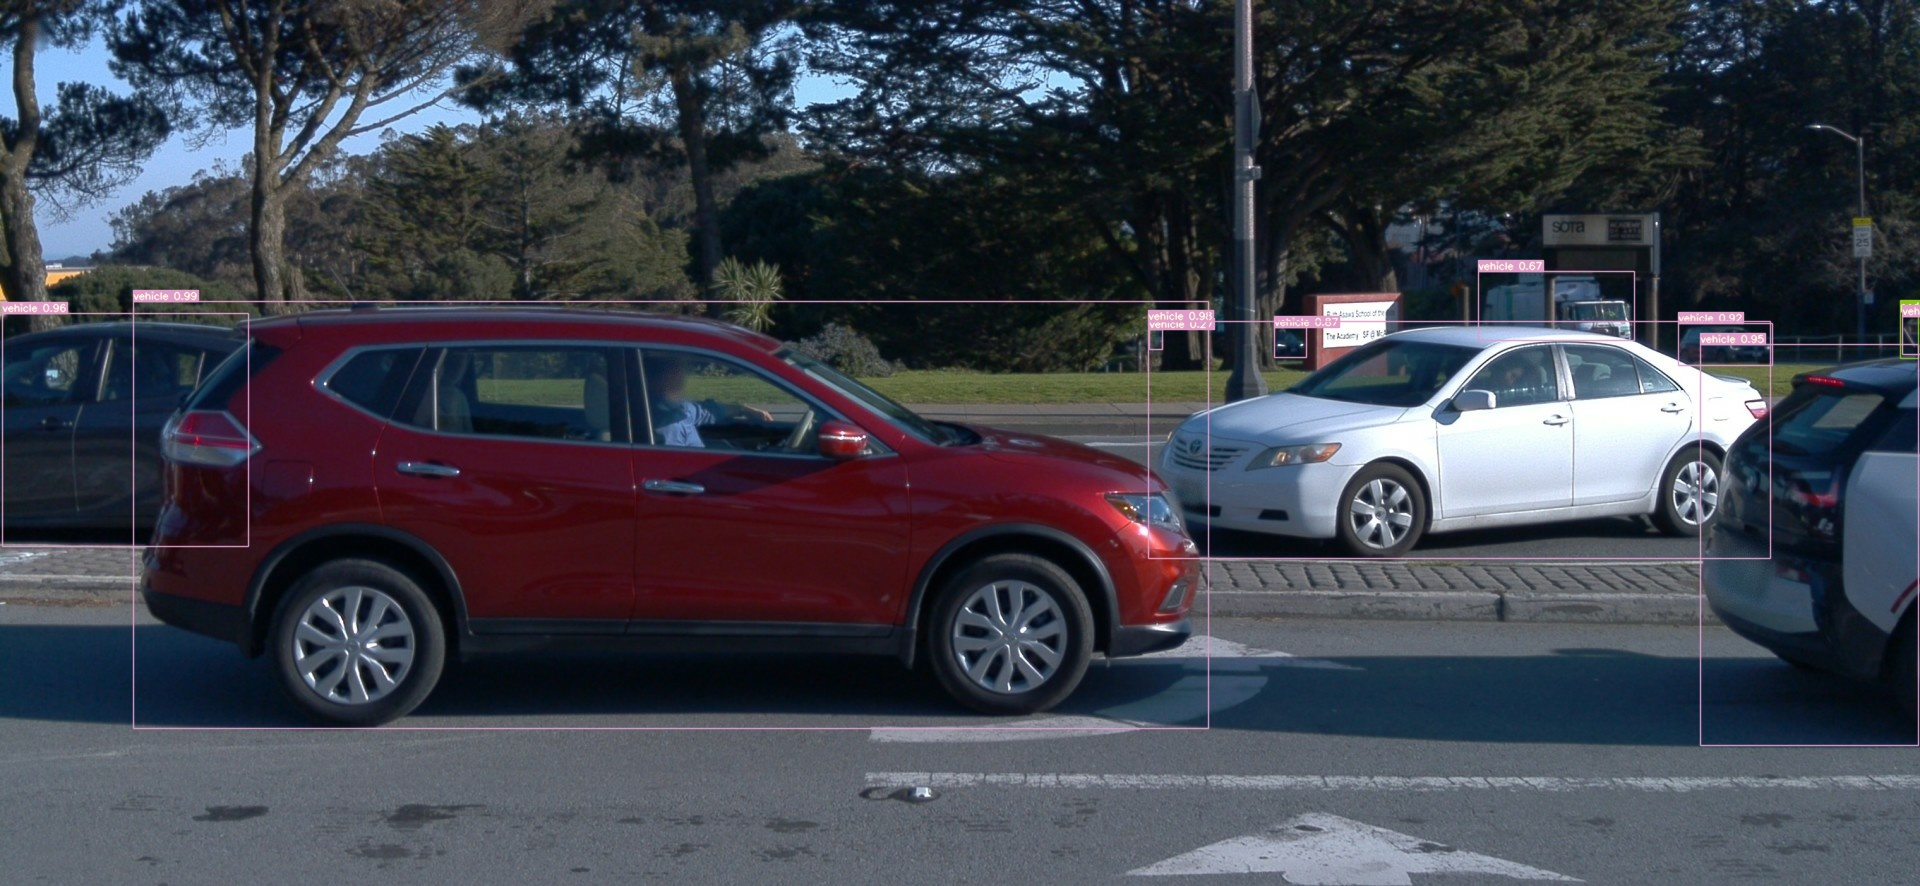

In [18]:
from PIL import Image
im = Image.open("runs/detect/results3/005482.jpg")
im

In [17]:
!python MyDetect.py --source ../2011_09_29_drive_0026_img2.mp4 --weights ./runs/train/yolov7x-waymo-mytrain4/weights/best.pt

[LOG YJ] Start... opt is  Namespace(weights=['./runs/train/yolov7x-waymo-mytrain4/weights/best.pt'], source='../2011_09_29_drive_0026_img2.mp4')
Fusing layers... 
IDetect.fuse
 Convert model to Traced-model... 
 traced_script_module saved! 
 model is traced! 

/home/013907062/.conda/envs/cmpe249/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
video 1/1 (1/164) /home/013907062/CMPE249/HW1_waymo/yolov7/../2011_09_29_drive_0026_img2.mp4: 12 vehicles, 1 pedestrian, Done. (22.7ms) Inference, (2.4ms) NMS
video 1/1 (2/164) /home/013907062/CMPE249/HW1_waymo/yolov7/../2011_09_29_drive_0026_img2.mp4: 11 vehicles, 1 pedestrian, Done. (22.8ms) Inference, (1.2ms) NMS
video 1/1 (3/164) /home/013907062/CMPE249/HW1_waymo/yolov7/../2011_09_29_drive_0026_